In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('/Users/brianoktavec/MSC550/Assignment_10/CAfemalebirths.csv', index_col=0, parse_dates=True)
df.head()

,births
date,
1959-01-01,47
1959-01-02,48
1959-01-03,51
1959-01-04,63
1959-01-05,35


# #1

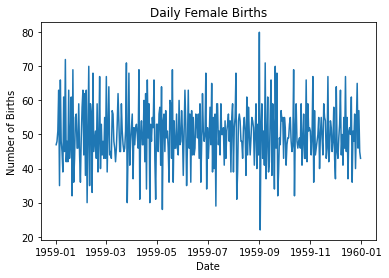

In [38]:
plt.plot(df)
plt.title('Daily Female Births')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.show()

# #2

Text(0, 0.5, 'ACF')

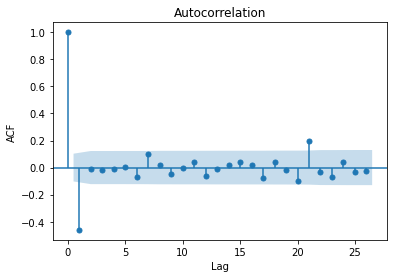

In [40]:
df = pd.read_csv('/Users/brianoktavec/MSC550/Assignment_10/CAfemalebirths.csv')

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df1.births)
plt.xlabel('Lag')
plt.ylabel('ACF')

Text(0, 0.5, 'PACF')

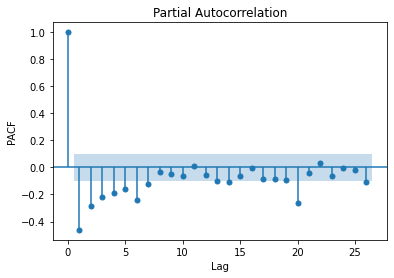

In [41]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df.births)
plt.xlabel('Lag')
plt.ylabel('PACF')

# #3

In [50]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df.births, order = (1,0,0))
ar = model.fit()
print(ar.summary())

                              ARMA Model Results                              
Dep. Variable:                 births   No. Observations:                  365
Model:                     ARMA(1, 0)   Log Likelihood               -1283.294
Method:                       css-mle   S.D. of innovations              8.139
Date:                Mon, 17 Apr 2023   AIC                           2572.589
Time:                        17:41:43   BIC                           2584.288
Sample:                             0   HQIC                          2577.238
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           50.0306      0.292    171.360      0.000      49.458      50.603
ar.L1.births    -0.4603      0.046     -9.923      0.000      -0.551      -0.369
                                    Roots   

/Users/brianoktavec/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


# #4

Text(0, 0.5, 'Residuals')

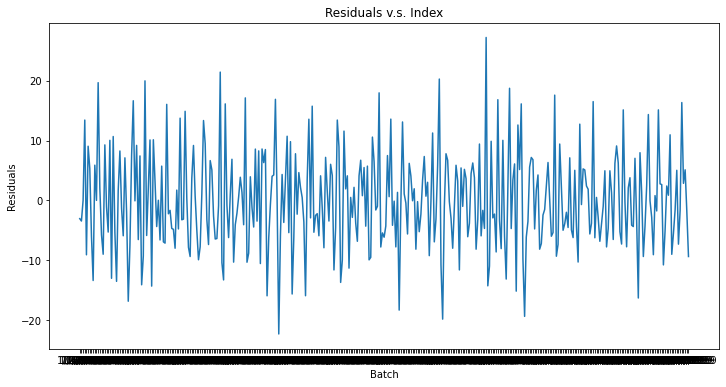

In [57]:
residual = ar.resid
plt.figure(figsize=(12,6))
plt.plot(df.date, residual)
plt.title('Residuals v.s. Index')
plt.xlabel('Batch')
plt.ylabel('Residuals')

Text(0, 0.5, 'Frequency')

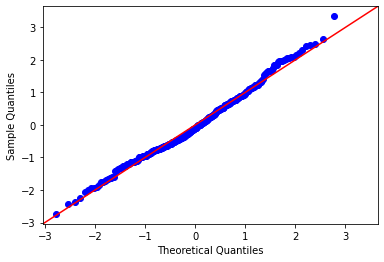

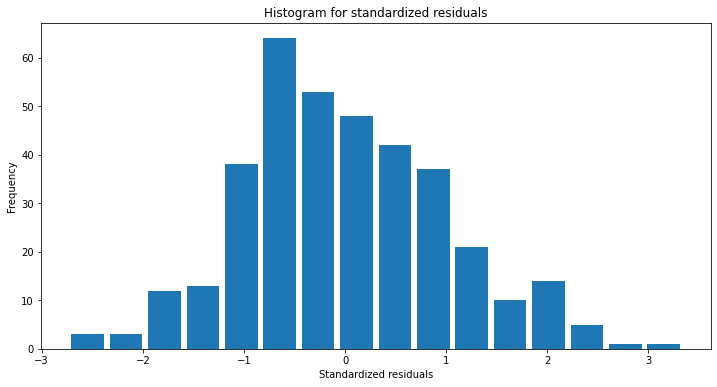

In [58]:
from sklearn.preprocessing import scale
import statsmodels.api as sm
residual_norm = scale(residual)
sm.qqplot(residual_norm, line='45')
plt.figure(figsize=(12,6))
plt.hist(x=residual_norm, bins='auto', rwidth=0.85)
plt.title('Histogram for standardized residuals')
plt.xlabel('Standardized residuals')
plt.ylabel('Frequency')

Text(0, 0.5, 'ACF')

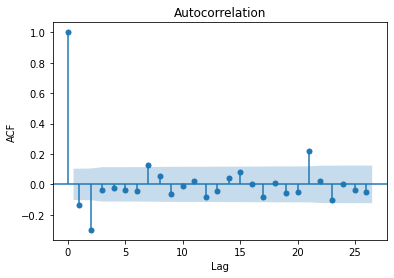

In [59]:
plot_acf(residual)
plt.xlabel('Lag')
plt.ylabel('ACF')

# #5

In [63]:
# N/A

# #6

In [62]:
ar.forecast(30)

(array([53.26698751, 48.54081082, 50.71639992, 49.71491643, 50.17592682,
        49.96371106, 50.06139981, 50.01643099, 50.03713137, 50.02760242,
        50.03198886, 50.02996966, 50.03089915, 50.03047128, 50.03066824,
        50.03057757, 50.03061931, 50.0306001 , 50.03060894, 50.03060487,
        50.03060675, 50.03060588, 50.03060628, 50.0306061 , 50.03060618,
        50.03060614, 50.03060616, 50.03060615, 50.03060616, 50.03060615]),
 array([8.13853354, 8.95941807, 9.12388637, 9.1583582 , 9.16564618,
        9.16718977, 9.16751683, 9.16758613, 9.16760081, 9.16760393,
        9.16760459, 9.16760473, 9.16760476, 9.16760476, 9.16760476,
        9.16760476, 9.16760476, 9.16760476, 9.16760476, 9.16760476,
        9.16760476, 9.16760476, 9.16760476, 9.16760476, 9.16760476,
        9.16760476, 9.16760476, 9.16760476, 9.16760476, 9.16760476]),
 array([[37.31575488, 69.21822013],
        [30.98067407, 66.10094756],
        [32.83391123, 68.5988886 ],
        [31.7648642 , 67.66496866],
      